In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import datetime

In [2]:
df = r"C:\Users\Pushkar Choudhary\Desktop\Python Assignment 5_BI\Ecommerce - UK Retailer.csv"
df=pd.read_csv(df, encoding = 'ISO-8859-1')

2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [3]:
print('The missing values in all columns are:-\n{}'.format(df.isnull().sum()))

The missing values in all columns are:-
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Thus from the analysis we need to replace the missing value of the description column with the mode is having a non numerical value and mode best and only suitable Statistcal method to do so

In [4]:
df.Description.fillna(df.Description.mode()[0],inplace = False)

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

Since the CustomerID column is having a numeric data type i.e float64 thus the median will be best to replace with the missing values



In [5]:
df.CustomerID.fillna(df.CustomerID.median(),inplace=False)

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

3. Remove duplicate rows

In [6]:
df.drop_duplicates(subset=None, keep='first',inplace=True)
df.duplicated().sum()

0

4. Remove rows which have negative values in Quantity column

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df = df[df.Quantity > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,526054.000000,526054.000000,392732.000000
mean,10.730874,3.871747,15287.734822
std,157.591838,42.016560,1713.567773
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,4.000000,2.080000,15150.000000
75%,11.000000,4.130000,16791.000000
max,80995.000000,13541.330000,18287.000000


1. Perform Basic EDA

a. Boxplot – All Numeric Variables

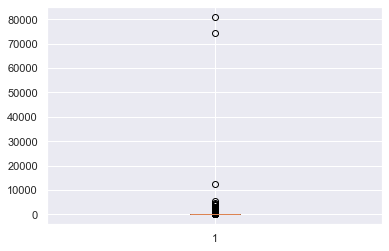

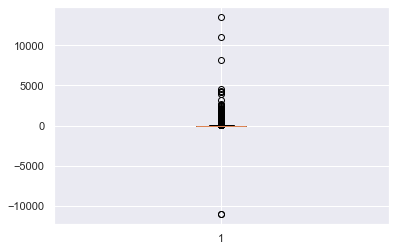

In [9]:
sns.set()
plt.boxplot(df.Quantity)
plt.show()
plt.boxplot(df.UnitPrice)
plt.show()

b. Histogram – All Numeric Variables

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'UnitPrice'}>],
       [<AxesSubplot:title={'center':'CustomerID'}>, <AxesSubplot:>]],
      dtype=object)

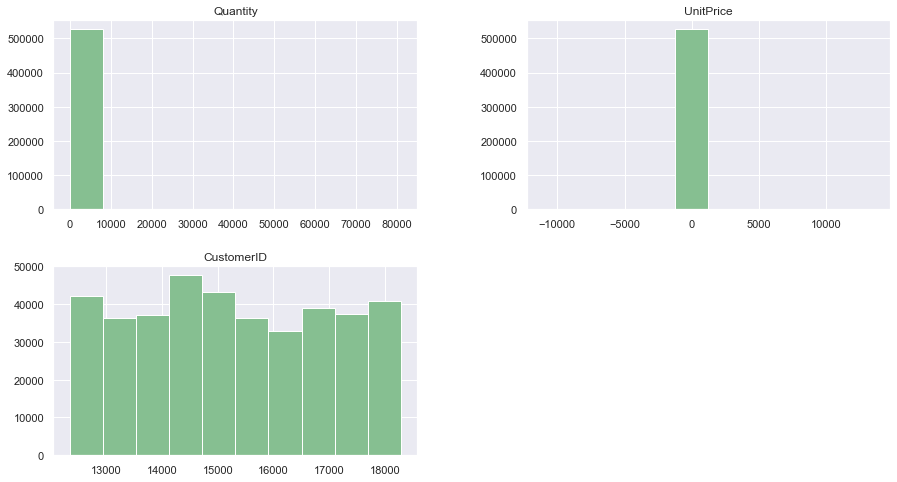

In [10]:
sns.set()
df.hist(color='#86bf91',figsize=(15,8))

c. Distribution Plot – All Numeric Variables

H:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


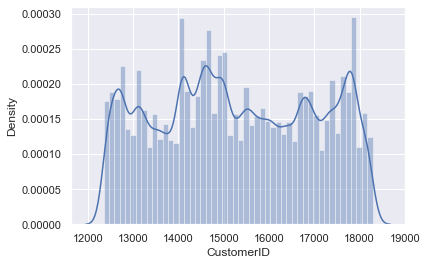

H:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


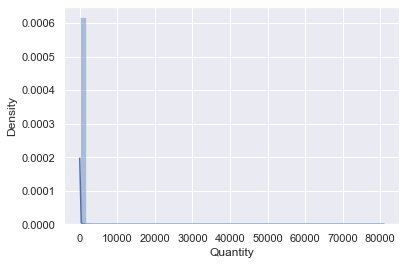

H:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


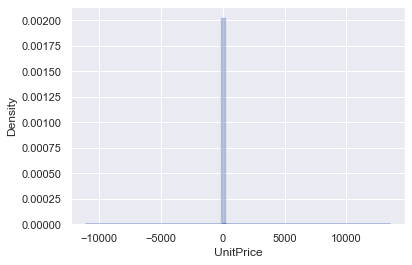

In [11]:
sns.set
sns.distplot(df['CustomerID'])
plt.show()
sns.distplot(df['Quantity'])
plt.show()
sns.distplot(df['UnitPrice'])
plt.show()


#If a data set has a positive skew, #but the mean of the returns is negative, it means that overall performance is negative #but here mean is positive hence performance is considerd as to be good

d. Aggregation for all numerical Columns

In [12]:
df.aggregate({"CustomerID":['sum', 'min'],
              "Quantity":['max', 'min'],
              "UnitPrice":['min', 'sum']})

,CustomerID,Quantity,UnitPrice
max,NaN,80995.0,NaN
min,1.234600e+04,1.0,-11062.060
sum,6.003983e+09,NaN,2036747.924


e. Unique Values across all columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526054 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    526054 non-null  object 
 1   StockCode    526054 non-null  object 
 2   Description  525462 non-null  object 
 3   Quantity     526054 non-null  int64  
 4   InvoiceDate  526054 non-null  object 
 5   UnitPrice    526054 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      526054 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ MB


In [14]:
print(df.InvoiceNo.unique())

['536365' '536366' '536367' ... '581585' '581586' '581587']


In [15]:
print(df.StockCode.unique())

['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']


In [16]:
print(df.Description.unique())

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'LETTER "U" BLING KEY RING'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


In [17]:
print(df.Quantity.unique())

[    6     8     2    32     3     4    24    12    48    18    20    36
    80    64    10   120    96    23     5     1    50    40   100   192
   432   144   288    16     9   128    25    30    28     7    56    72
   200   600   480    14    11    33    13    70   252    60   216   384
    27    15    22    19    17    21    34    47   108    52    75   270
    42   240    90   320  1824   204    69   160  2880  1400    39    26
  1440    31    82    78    97    98    35    57   110   720   156   324
    38    37    49    95    29    41   402   378   150   300    54   104
    67   258    66    44    55    46    99    61   408   972   208  1008
  1000  1488   250  1394   400    79    84   272   113    45   106    68
   267   115    65  1728    53    76   460    71    43   213    58   576
  2400   500   180   752   960  1296   210   172   215   129   138   116
   135   197   147   168   256   860  1010  1356  1284   186   114   360
  1930  2000  3114  1300   670   111   211    59   

In [18]:
print(df.InvoiceDate.unique())

['12/1/2010 8:26' '12/1/2010 8:28' '12/1/2010 8:34' ... '12/9/2011 12:31'
 '12/9/2011 12:49' '12/9/2011 12:50']


In [19]:
print(df.UnitPrice.unique())

[   2.55    3.39    2.75 ...    4.76  933.17 1714.17]


In [20]:
print(df.CustomerID.unique())

[17850. 13047. 12583. ... 13298. 14569. 12713.]


In [21]:
print(df.Country.unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


f. Duplicate values across all columns

In [22]:
df.duplicated(subset = None, keep = 'first')

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 526054, dtype: bool

g. Correlation – Heatmap - All Numeric Variables

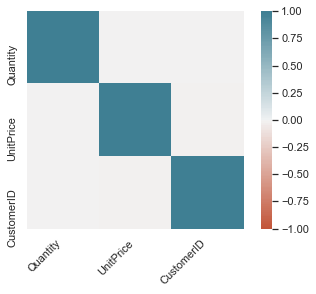

In [23]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

l. Plot the skewness - All Numeric Variables

In [24]:
df.skew(axis = 0, skipna = True)

Quantity      457.999413
UnitPrice      60.256683
CustomerID      0.030195
dtype: float64

In [25]:
df.skew(axis = 1, skipna = True)

0         1.732051
1         1.732051
2         1.732050
3         1.732051
4         1.732051
            ...   
541904    1.732046
541905    1.732050
541906    1.732051
541907    1.732051
541908    1.732051
Length: 526054, dtype: float64

5. Add the columns - Month, Day and Hour for the invoice

converting the string column to date datatypes

In [26]:
df.InvoiceDate=pd.to_datetime(df.InvoiceDate)

adding month day and hour columns with the data which i mapped through InvoiceDate column to take in the data

In [27]:
df.insert(loc=1, column='Year_Month', value=df.InvoiceDate.map(lambda x: 100*x.year + x.month))
df.insert(loc=2, column='Month', value=df.InvoiceDate.dt.month)

considering +1 to make it monday as we start our week from Monday and thus sunday will be taken as 7....

In [28]:
df.insert(loc=3, column='day', value=(df.InvoiceDate.dt.dayofweek)+1)
df.insert(loc=4, column='hour', value=df.InvoiceDate.dt.hour)

In [29]:
df

,InvoiceNo,Year_Month,Month,day,hour,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,201012,12,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,201012,12,3,8,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,201012,12,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,201012,12,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,201012,12,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,201112,12,5,12,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,201112,12,5,12,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,201112,12,5,12,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,201112,12,5,12,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


i. Bar Plot – Every Categorical Variable vs every Numerical Variable

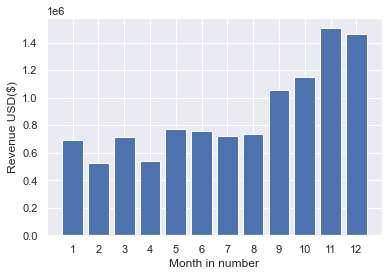

In [30]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
result = df.groupby('Month').sum()
Month=range(1,13)
plt.bar(Month,result['Revenue'])
plt.xticks(Month)
plt.xlabel('Month in number')
plt.ylabel('Revenue USD($)')
plt.show()


k. Line chart to show the trend of data - All Numeric/Date Variables

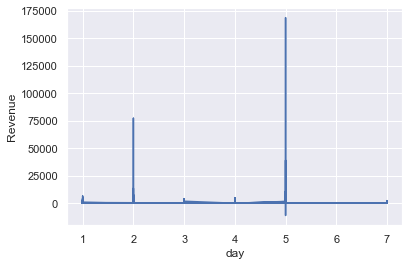

In [31]:
plt.plot(df['day'],df['Revenue'])
plt.xlabel('day')
plt.ylabel('Revenue')
plt.show()

6. How many orders made by the customers?

groupig the customer id and their invoice to exmamin the order made by the customers

In [32]:
df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


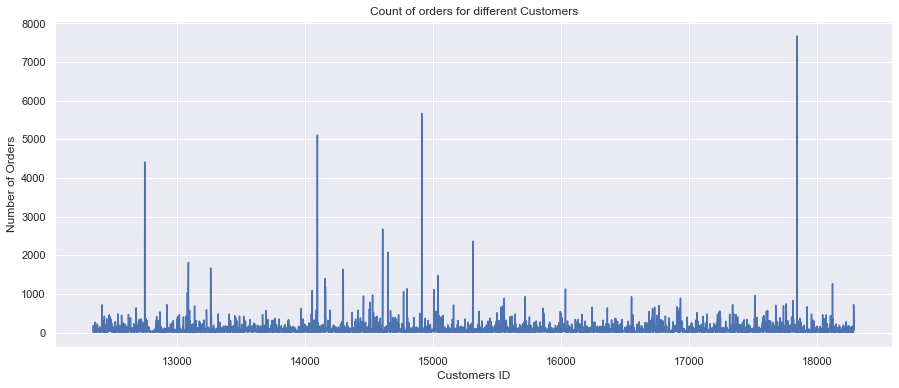

In [33]:
sns.set()
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Count of orders for different Customers')
plt.show()

7. TOP 5 customers with higher number of orders

In [34]:
print('The TOP 5 customers with max no of orders are:')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with max no of orders are:


,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7676
1888,14911.0,EIRE,5672
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4413
1670,14606.0,United Kingdom,2677


8. How much money spent by the customers?¶

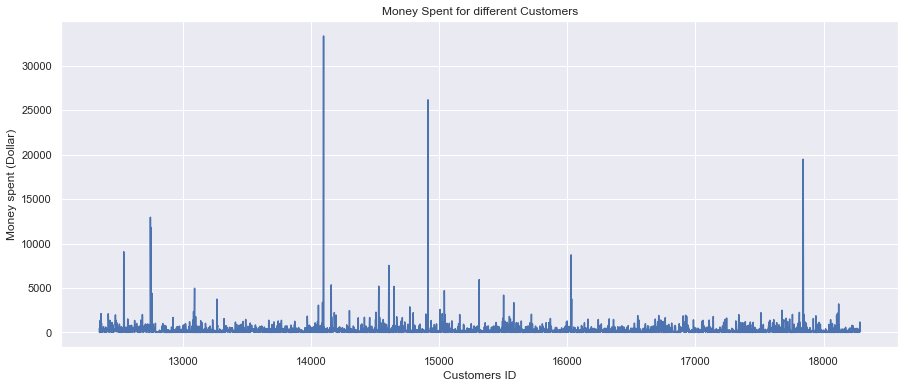

In [37]:
mkr_gone = df.groupby(by=['CustomerID','Country'], as_index=False)['UnitPrice'].sum()

sns.set()
plt.subplots(figsize=(15,6))
plt.plot(mkr_gone.CustomerID, mkr_gone.UnitPrice)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

9. TOP 5 customers with highest money spent

In [38]:
print('The TOP 5 customers with max no of orders...')
mkr_gone.sort_values(by='UnitPrice', ascending=False).head()

The TOP 5 customers with max no of orders...


,CustomerID,Country,UnitPrice
1298,14096.0,United Kingdom,33332.45
1888,14911.0,EIRE,26150.35
4019,17841.0,United Kingdom,19471.68
332,12744.0,Singapore,12949.99
334,12748.0,United Kingdom,11788.31


10. How many orders per month?

In [39]:
df.head()

,InvoiceNo,Year_Month,Month,day,hour,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,201012,12,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,201012,12,3,8,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,201012,12,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,201012,12,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,201012,12,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Text(0, 0.5, 'number of orders')

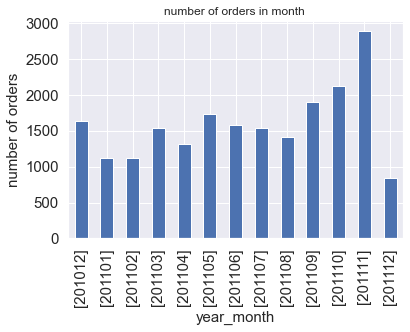

In [40]:
sns.set()
ax = df.groupby('InvoiceNo')['Year_Month'].unique().value_counts().sort_index()
ax.plot(kind="bar",title="number of orders in month ",fontsize=15)
plt.figsize=(15,6)
plt.xlabel("year_month",fontsize=15)
plt.ylabel("number of orders",fontsize=15)

11. How many orders per day?

Text(0, 0.5, 'Number of Orders')

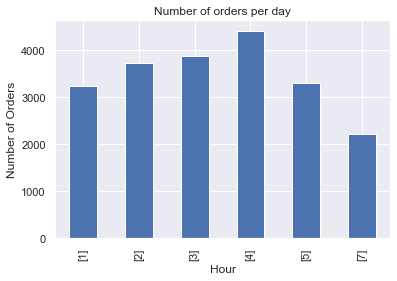

In [41]:
sns.set()
pikapika=df.groupby('InvoiceNo')['day'].unique().value_counts().sort_index()
pikapika.plot(kind="bar", title="Number of orders per day")
plt.figsize=(15,6)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

12. How many orders per hour?

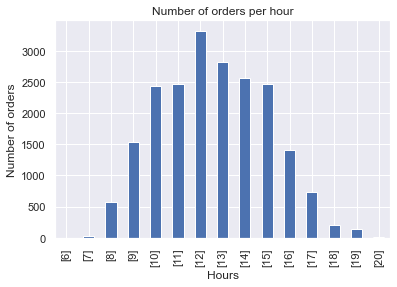

In [42]:
sns.set()
syduck=df.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index()
syduck.plot(kind="bar",title="Number of orders per hour")
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.show()

13. How many orders for each country?

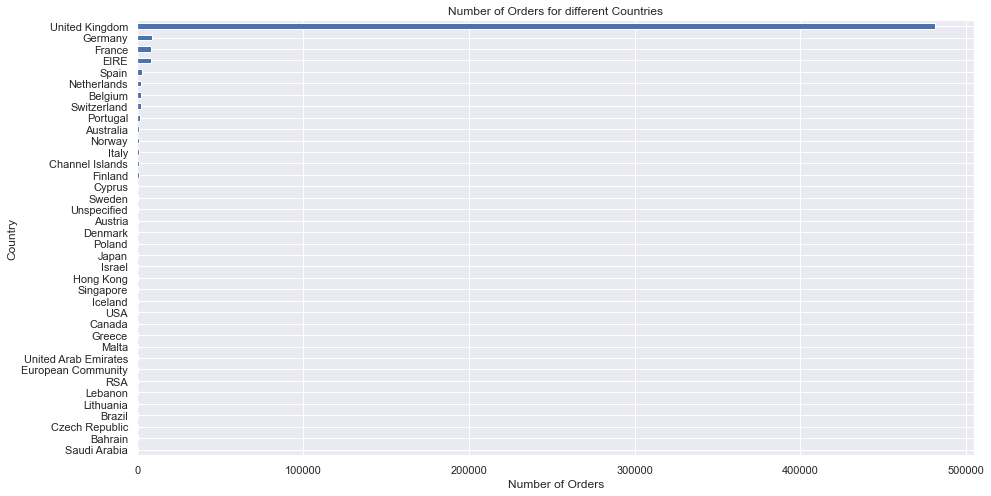

In [43]:
sns.set()
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Number of Orders for different Countries')
plt.show()

'since our dataset is baised on united kingdom thus it is being difficult to analyse the data of other countries as uk is having most of the data and suppressing others so to analyse other country data it will be better to drop it a while '

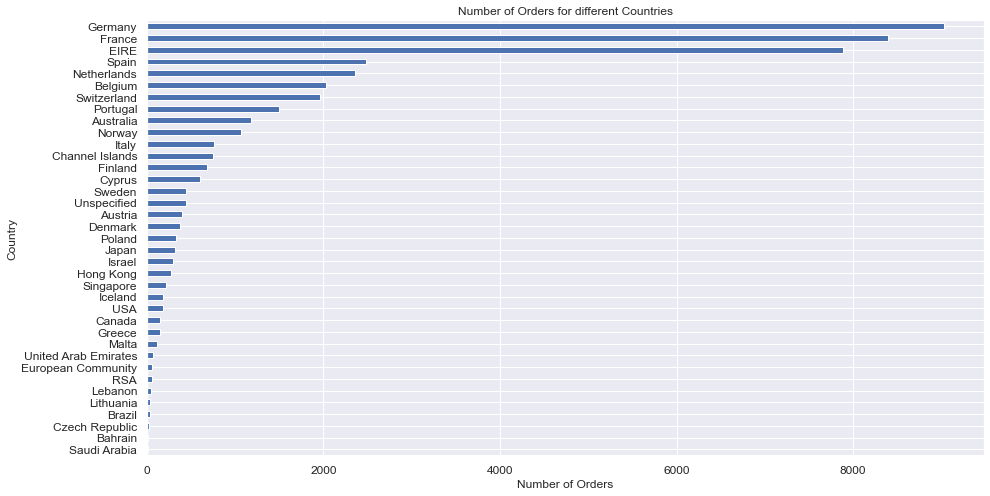

In [44]:
sns.set()
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country without uk 
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh',fontsize=12)
plt.xlabel('Number of Orders',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Number of Orders for different Countries',fontsize=12)
plt.show()

14. Orders trend across months

Text(0, 0.5, 'Orders')

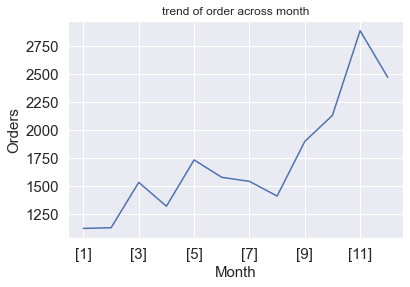

In [45]:
sns.set()
ord_mon=df.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index()
ord_mon.plot(kind="line",title="trend of order across month",fontsize=15)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Orders",fontsize=15)

15. How much money spent by each country?

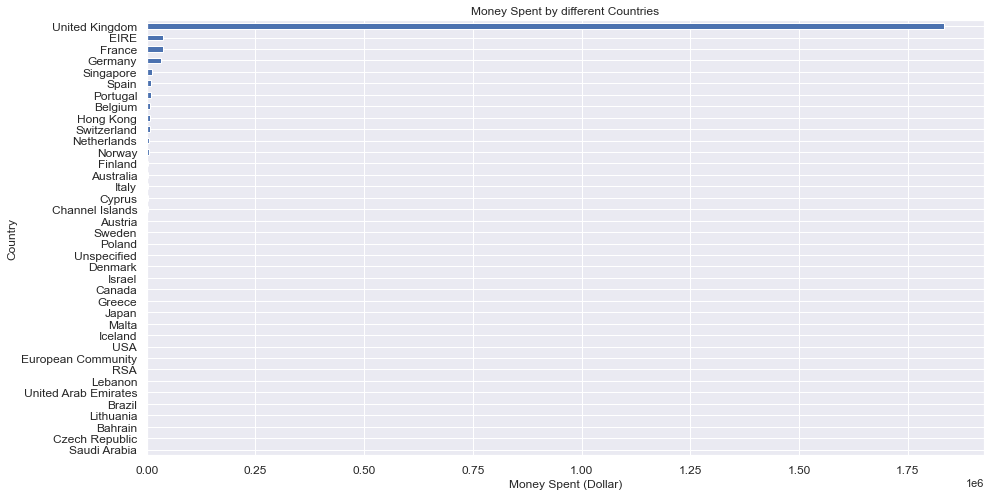

In [46]:
sns.set()
money = df.groupby('Country')['UnitPrice'].sum().sort_values()

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
money.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

Again the problem arrose that data is baised towards united kingdom thus removing uk will improve the analysis

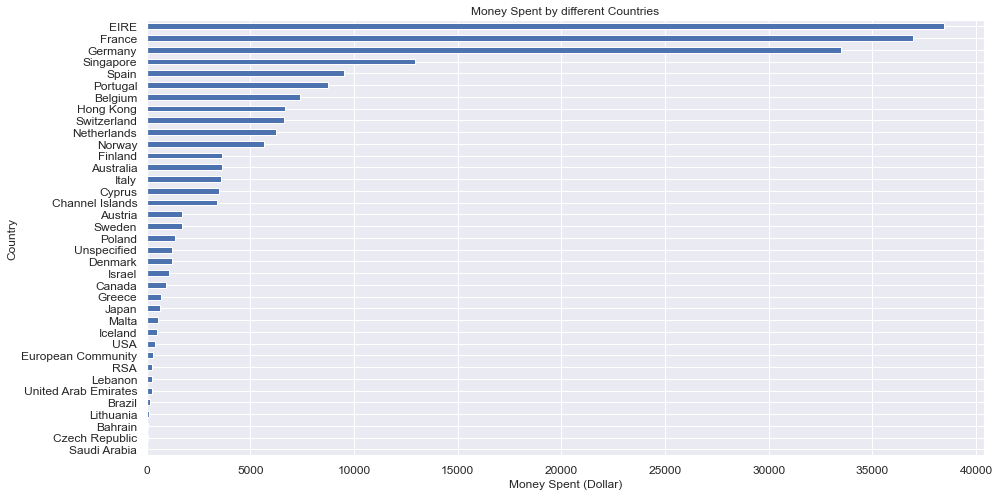

In [47]:
money = df.groupby('Country')['UnitPrice'].sum().sort_values()
del money['United Kingdom']

# plot number of unique customers in each country
plt.subplots(figsize=(15,8))
money.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()